In [1]:
None

# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Summary](#Summary)
    - [Metadata Handover](#Metadata-Handover)

## Sample Records Analysis

Swissbib has provided a data file with some records [[SwRe](./A_References.ipynb#swre)]. In this section, the data file will be loaded and some sample data records will be shown.

In [2]:
import os

path_data = './data'

# If Swissbib's data file happens to be present, the unzip command would halt the process.
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # => Delete data file if present.
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

! unzip $path_data/datafile.zip -d $path_data/

Archive:  ./data/datafile.zip
  inflating: ./data/job7r4A1.json    


The provided file has a size of more than 100MB. Due to its size, it cannot be checked in into a github repository. In order to check in the file nonetheless, it has been compressed with a standard zip format. The code cell above extracts the file and stores it in the same directory as the original zip file.

In [3]:
import json

records = []
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded {:,d}'.format(len(records)))

Number of data records loaded 183,407


The data has been read into a list of records. Let's have a look at the loaded data.

In [4]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [5]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"700":[],"800":[],"245c":["André Schluchter"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"700":[],"800":[],"245c":["von Werner Naegeli"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1986 

Now, the extracted data file is not needed anymore and can be removed with the goal to keep the original zip file, only.

In [6]:
# Swissbib's data file is not needed in unzipped form anymore
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # Delete data file
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

print('Number of records {:,d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183,407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format     

Swissbib's data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [7]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '700': [], '800':...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes'], '700': ['SchayeghL...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph', ...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon'], '700': [], '...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [12]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [13]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate     {'110': ['St. Gallischer Hilfsverein'], '710':...
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [14]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

An analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to a specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [15]:
# Initialize the global dictionary
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [16]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the next chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [17]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [18]:
# Initialize list of dictionary item
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [19]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [20]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [21]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [22]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [23]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


152348                                         [(CEO)32534]
49058     [(IDSLU)001344712, (DE-599)DNB1156934869, (OCo...
80934     [(OCoLC)303021168, (NEBIS)011320429, (OCoLC)30...
126490    [(VAUDS)991002866758202853, (EXLNZ-41BCULAUSA_...
92560     [(VAUD)991021200173802852, (EXLNZ-41BCULAUSA_N...
112784                                   [(RERO)R008899470]
90795                                    [(RERO)R008895610]
124602                [(OCoLC)1089172727, (NEBIS)011367435]
78429                                    [(RERO)R008893149]
89391        [(SERSOL)ssib034519456, (WaSeSS)ssib034519456]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [24]:
columns_metadata_dict['strings_columns'] = ['century']

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In [25]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [26]:
df['century'].sample(n=15)

89799     2019
12817     2009
37762     2018
157887    1999
152564    1991
149179    1998
151875    1936
68443     1988
138299    1555
174365    1988
169889    1951
72919     uuuu
85589     2018
33309     2014
141992    1997
Name: century, dtype: object

In [27]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [28]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [29]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The list of year-dates without any unknown value is shown below.

In [30]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

Expecting the data extract provided is a statistically random sample, the following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

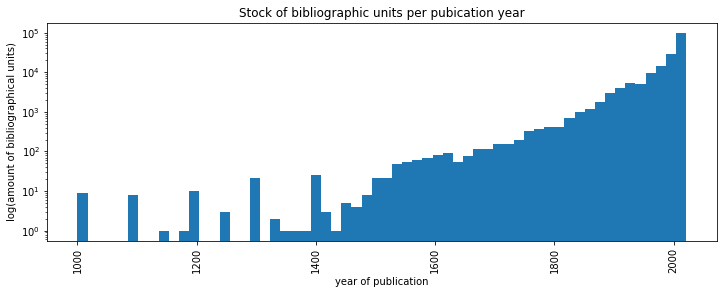

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

Care has to be taken with this attribute considering Swissbib's deduplication implementation. There, the attribute holds the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$, see below, an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account.

In [32]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [33]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographic unit of format map.

In [34]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [35]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [36]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

95838                         [E0113057, N0480956]
15755                         [E0073837, N0473507]
56848                         [E0070817, N0465643]
106174                        [W0155100, N0281100]
178473                                          []
114824                        [E0083719, N0471253]
114730                        [E0062610, N0470006]
122281    [E0050137, E0071337, N0474905, N0475341]
29280                                           []
25433                         [E0063800, N0465300]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [37]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

25264           [E0064742, E0064739, N0455536, N0455532]
83161           [E0073547, E0073544, N0465345, N0465341]
20644           [E0054415, E0054415, N0480000, N0480005]
141177          [E0092606, E0092611, N0471527, N0471532]
144673          [E0071030, E0071454, N0472004, N0471948]
137329          [E0082310, E0082314, N0464707, N0464711]
59044           [E0083032, E0083000, N0472444, N0472400]
15139     [E012.500000, E0123000, N046.750000, N0464500]
138916          [E0083628, E0083632, N0462733, N0462738]
135681          [E0083706, E0083706, N0470000, N0470001]
Name: coordinate, dtype: object

In [38]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [39]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed according to Swissbib's project team suggestion [[WiCo2001](./A_References.ipynb#wico2001)] with the help of a function $\texttt{.split}\_\texttt{coordinate}()$.

In [40]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [41]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

114708    e0093325
114772    e0063307
27755     e0095238
102577    e0090500
138344    e0053613
61888     e0055434
110018    w0110000
126871    e0064700
126851    e0072123
126817    e0071429
54198     e0072733
126868    e0064657
114820    e0062624
11084     e0072600
147243    e0083238
20582     w1800000
105249    w0041300
59269     e0055427
62068     e0085600
35950     e0513000
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [42]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

59700     n0381200
114847    n0464714
20714     n0470703
31863     n0464650
113768    n0470912
182744    n0465350
114739    n0470537
103980    n0471841
126762    n0464043
131853    n0464212
54206     n0465727
57096     n0300000
85780     n0465941
115814    n0475029
126766    n0464045
146672    n0465956
142610    n0620000
59325     n0481100
146676    n0470015
28259     n0464612
Name: coordinate_N, dtype: object

In [43]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attribute $\texttt{coordinate}$ is dropped.

In [44]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [45]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For the analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list}()$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [46]:
df.corporate.sample(n=20)

89978                     {'110': [], '710': [], '810': []}
38899                     {'110': [], '710': [], '810': []}
132886                    {'110': [], '710': [], '810': []}
81510                     {'110': [], '710': [], '810': []}
169320                    {'110': [], '710': [], '810': []}
127794                    {'110': [], '710': [], '810': []}
117339                    {'110': [], '710': [], '810': []}
92642                     {'110': [], '710': [], '810': []}
129316                    {'110': [], '710': [], '810': []}
147691                    {'110': [], '710': [], '810': []}
54526                     {'110': [], '710': [], '810': []}
72681                     {'110': [], '710': [], '810': []}
49401                     {'110': [], '710': [], '810': []}
144665                    {'110': [], '710': [], '810': []}
14094                     {'110': [], '710': [], '810': []}
92518     {'110': ['Montres Rolex SA'], '710': [], '810'...
46179                     {'110': [], '7

In [47]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographic units are units produced by persons, not corporates.

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [49]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [50]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,verein deutscher bibliothekareregionalverband ...,verein deutscher bibliothekareregionalverband ...
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,heilsarmeenationales hauptquartier bern,salvation armynationales hauptquartier
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [51]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

174685                     fédération internationale de ski
163807                  republic of china olympic committee
150940              international maccabiah games committee
159507                      international olympic committee
149877    summer olympic games. organizing committee. 24...
162289                      international olympic committee
161662                            polski komitet olimpijski
23964                                       hallinger & co.
164260    summer olympic games. organizing committee. 31...
149195    olympic winter games. organizing committee. 16...
102771                            galerie priska meier zell
170711    conseil de l'europe. conseil de la coopération...
158591    summer olympic games. organizing committee. 19...
167987                      international olympic committee
164038                                      equipe magazine
168751                              malta olympic committee
166194    summer olympic games. organizi

In [52]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

59160                              world trade organization
35915                                       kloster dornach
151972                   association internationale de boxe
14894                                     universität basel
75206     british geotechnical association, geological s...
19242                                 atelier otto rietmann
155100      algérie. ministère de la jeunesse et des sports
25259                                    cost action fp1301
180552                        springerlink (online service)
31649     gug lib jung ang bag mul gwan, gug lib jung an...
22049                                        ferrobeton spa
5042                                      quintette nielsen
2629                                             nickelback
10302                                  flamenco inspiration
115274                                atelier otto rietmann
94982                                      academia raetica
165954                                  

In [53]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

122278      deutschlandverteidigungsministerium
106179                  hallwag kümmerly + frey
94678                                 hécatombe
72532                             werbung kiser
94679                                 hécatombe
106150                  hallwag kümmerly + frey
106156                  hallwag kümmerly + frey
110586                  hallwag kümmerly + frey
106184                  hallwag kümmerly + frey
52134           kunsthandlung helmut h. rumbler
72548                             werbung kiser
113870                  peter-ochs-gesellschaft
104826                usadepartment of the army
86065                   hallwag kümmerly + frey
110593                                hema maps
115817      deutschlandverteidigungsministerium
53969     schweizbundesamt für landestopografie
133739      deutschlandverteidigungsministerium
106199                  hallwag kümmerly + frey
104811                        usawar department
Name: corporate_810, dtype: object

In [54]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080     {'110': [], '710': [], '810': ['Wirtschaftsuni...
47145     {'110': ['Biochemical Society (Great Britain)S...
52134     {'110': [], '710': ['Kunsthandlung Helmut H. R...
94673     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94674     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94678     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94679     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94680     {'110': [], '710': ['Ensemble Batida', 'Hécato...
113869    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
113870    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
133706    {'110': ['Carnegie Endowment for International...
133739    {'110': [], '710': [], '810': ['DeutschlandVer...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed to the feature matrix as one single attribute. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys}()$, the result of which is shown below for some sample cases.

In [55]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [56]:
len(df['corporate_full'].loc[0])

0

In [57]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

159566    international olympic committee. international...
85333                               graubündner turnverband
53947                   museum für ostasiatische kunst köln
162110    international olympic committee. international...
158858    summer olympic games. organizing committee. 24...
162344    summer olympic games. organizing committee. 19...
158973                          jamaica olympic association
21761                              theaterverein hintercher
169473    olympic movement unit on the prevention of the...
159537    olympic winter games. organizing committee. 22...
150486    summer olympic games. organizing committee. 24...
153800                             wenlock olympian society
168142    olympic winter games. organizing committee. 22...
154446    summer olympic games. organizing committee. 20...
155768    southern california committee for the olympic ...
152192                        hellas. hypourgeio politismou
167111         centre international pour

155241    gesellschaft zur förderung des olympischen ged...
78657     wiener singakademie, radio-symphonieorchester ...
169467    olympic winter games. organizing committee. 9,...
83807                                       neurdein frères
104584                   cäcilienverein der stadt solothurn
3837                                        kümmerly + frey
77342                     nordostschweizer schwingerverband
150224    sportel (monaco) symposium international sport...
163756    guam national olympic committee guam amateur s...
21437                                          nomos verlag
93020                                                  spie
139291    société française de pharmacologie clinique et...
31437                         faggionato fine arts (london)
29916                            caves du manoir (martigny)
12085                             cheroba, fiato delle alpi
162145       nationales olympisches komitee für deutschland
83646                      arbeitsgemein

In [58]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [59]:
columns_metadata_dict['strings_columns'].append('decade')

Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see code cell below and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

In [60]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [61]:
columns_metadata_dict['strings_columns'].append('docid')

In [62]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [63]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [64]:
columns_metadata_dict['list_columns'].append('doi')

In [65]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 9553, with missing doi 173854 => 5.2%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [66]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1899         [10.5451/unibas-007052902]
1937         [10.5451/unibas-007052953]
4710           [10.14361/9783839445334]
10480        [10.5451/unibas-007052913]
11917       [10.1007/978-1-4939-6572-4]
15775    [10.5771/1439-880X-2018-3-362]
16124            [10.3931/e-rara-74297]
16194           [10.4324/9781138604391]
16212            [10.3931/e-rara-74297]
16219            [10.3931/e-rara-74297]
16222            [10.3931/e-rara-74297]
16244            [10.3931/e-rara-74297]
16245            [10.3931/e-rara-74297]
16256            [10.3931/e-rara-74297]
16265           [10.4324/9781315562193]
16301           [10.4324/9781315692845]
16354            [10.3931/e-rara-74439]
16356                  [10.3726/b14897]
16447           [10.4324/9781315150918]
16637          [10.1186/1478-4505-8-31]
Name: doi, dtype: object

In [67]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

94847         [10.5167/uzh-162425, 10.15252/emmm.201809443]
42580                       [10.4159/harvard.9780674418233]
139498                             [10.14361/9783839444870]
97317                                [10.5169/seals-790693]
49797               [10.5167/uzh-161160, 10.11607/prd.3636]
182774                                      [10.1142/10892]
29437                               [10.1167/iovs.16-20657]
97096                                [10.5169/seals-790513]
97219                                [10.5169/seals-790764]
86260                                  [10.5167/uzh-167797]
96579                                [10.5169/seals-790329]
34423                                  [10.5167/uzh-163012]
99370                                [10.3931/e-rara-74919]
122210     [10.5167/uzh-166051, 10.1038/s41598-018-27422-0]
61200     [10.5167/uzh-161526, 10.1371/journal.pone.0208...
34357                           [10.1007/s00208-017-1543-1]
125709                          [10.1007

In [68]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbdul', 'CatoKerry...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [69]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

9,553 records hold 1 list element(s).
2,232 records hold 2 list element(s).
=> Maximum number of list elements 2


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element}()$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [70]:
df = dpf.reduce_to_attrib_element(df, 'doi')

df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

146750         10.5169/seals-799575
172595           10.5167/uzh-167750
110888           10.5167/uzh-168117
110804           10.5167/uzh-165266
94845            10.5167/uzh-162417
92783            10.5167/uzh-164849
101641        10.3139/9783446456990
113000            10.1026/02510-000
104877    10.1007/s00134-017-5043-2
103034           10.5167/uzh-168774
99766            10.5167/uzh-159711
41716     10.1007/978-981-13-1370-7
97702          10.5169/seals-791190
181562             10.1002/cre2.122
113513     10.3929/ethz-b-000314685
148016           10.5167/uzh-160278
83328      10.1515/fabula-2018-0006
172612           10.5167/uzh-168172
97214          10.5169/seals-790759
46888     10.1007/978-3-486-71133-2
Name: doi, dtype: object

In [71]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [72]:
columns_metadata_dict['strings_columns'].append('edition')

In [73]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [74]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

51942                        1st ed. 2019.
73723     Riduzione per canto e pianoforte
35950                   8. aktual. Auflage
128351              5e éd., revûë et corr.
120907                              1st ed
74886             Ungekürzte Autorenlesung
98288                         Nouvelle éd.
105531                          1st ed. UK
25287                        First edition
123511                      Second edition
2219                         Original 1973
18841                         Auflage 2019
109796                              7e éd.
139003                          1. Auflage
115547                       First edition
113771                      Nachträge 1900
120679                             1st ed.
75983                              20e éd.
32081                    2. Gesammtausgabe
48559                           [3. Aufl.]
Name: edition, dtype: object

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ has been implemented for attribute $\texttt{edition}$.

In [75]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

51942        1
73723         
35950        8
128351       5
120907       1
74886         
98288         
105531       1
25287         
123511        
2219      1973
18841     2019
109796       7
139003       1
115547        
113771    1900
120679       1
75983       20
32081        2
48559        3
Name: edition, dtype: object

In [76]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filled rows has been reduced further.

In [77]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [78]:
columns_metadata_dict['strings_columns'].append('exactDate')

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographic units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographic units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

In [79]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [80]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [81]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [82]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'u', ' ', '-'}


In [83]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [84]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [85]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristian', 'Hängg...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [86]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [87]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used for all other values of the attribute.

In [88]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [89]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

120609    bk020053
54229     bk020000
146105    bk020000
52860     bk020000
161831    bk020000
4416      mu040100
99624     mu010000
166949    bk020000
122967    bk020000
108331    bk020053
Name: format, dtype: object

In [90]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [91]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

158027    
153634    
164382    
169059    
152994    
171207    
165695    
150348    
165801    
154208    
Name: format, dtype: object

In [92]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [93]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the six subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [94]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
136937,bk020000,bk,020000
28309,bk020000,bk,020000
33349,bk020053,bk,020053
9200,bk020000,bk,020000
64574,bk020000,bk,020000
26430,bk020000,bk,020000
32275,bk020000,bk,020000
163729,bk020000,bk,020000
58304,bk010000,bk,010000
22907,bk020000,bk,020000


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format}()$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py).

In [95]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [96]:
columns_metadata_dict['list_columns'].append('isbn')

In [97]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, either the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [98]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

31931     [978-3-00-061121-6]
77084         [3-930813-54-8]
146843    [978-0-9929460-7-4]
35251     [978-1-250-07599-4]
53018     [978-3-643-14039-5]
175409    [978-2-296-06442-3]
121841    [978-3-03899-005-5]
80465         [3-923776-37-3]
161628        [0-7506-1293-2]
73908     [978-2-251-44844-2]
61484     [978-2-35105-137-5]
14910         [0-7546-1487-5]
48205         [3-406-08488-5]
87440     [978-1-5261-2924-6]
35110             [2468-4481]
35109             [2468-4481]
82599     [978-2-07-053546-0]
48247         [3-530-16669-3]
81963     [978-2-09-038199-3]
3515      [978-3-440-11226-7]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [99]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

41502        [978-3-11-010342-7 (print), 978-3-11-086244-7]
89408                    [978-3-11-002646-7, 3-11-002646-5]
60609                [979-11-5610-205-2, 979-11-5610-204-5]
88315                    [978-1-5386-9356-8, 1-5386-9356-9]
61815                    [978-3-466-34719-3, 3-466-34719-X]
86730                [978-2-406-07139-6, 978-2-406-07138-9]
125639                   [978-3-14-117290-4, 3-14-117290-0]
38602     [978-0-691-12280-9 (hardback : alk. paper), 0-...
34879     [978-1-322-00297-2, 978-3-8376-1599-9, 978-3-8...
82111                    [978-3-89691-997-7, 3-89691-997-0]
98314                    [2-409-01621-9, 978-2-409-01621-9]
113869                   [978-3-85616-090-6, 3-85616-090-6]
131839                   [978-3-8252-5067-6, 3-8252-5067-9]
1964                     [3-422-96901-2, 978-3-422-96901-8]
103520    [978-4-642-06826-0, 4-642-06826-0, 978-4-642-0...
42950        [978-3-11-012827-7, 978-3-11-085434-3 (ebook)]
128787                   [978-3-453-4713

In [100]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).
3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).
519 records hold 5 list element(s).
398 records hold 6 list element(s).
173 records hold 7 list element(s).
156 records hold 8 list element(s).
84 records hold 9 list element(s).
76 records hold 10 list element(s).
51 records hold 11 list element(s).
43 records hold 12 list element(s).
29 records hold 13 list element(s).
26 records hold 14 list element(s).
19 records hold 15 list element(s).
18 records hold 16 list element(s).
10 records hold 17 list element(s).
9 records hold 18 list element(s).
8 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
7 records hold 24 list element(s).
5 records hold 25 list element(s).
4 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list elemen

In [101]:
max(df.isbn.apply(lambda x : len(x)))

42

In [102]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

59865     [978-88-88001-42-5, 88-88001-42-5, 978-88-8800...
84814     [5-93799-010-2, 5-93799-001-3, 5-93799-002-1, ...
113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
133692    [0-444-82588-6 (set vols. 1A1B), 0-444-50728-0...
16380     [978-4-06-509002-2, 4-06-509002-4, 978-4-06-50...
116242    [978-7-107-30418-7, 7-107-30418-6, 978-7-107-3...
84105     [978-3-12-607026-3, 3-12-607026-4, 978-3-12-60...
95709     [4-8104-0658-X, 978-4-8104-0658-0, 4-8104-0659...
28221     [978-3-7910-2601-5, 978-3-7910-2602-2, 978-3-7...
78410     [978-2-35241-063-8, 978-2-911565-89-2, 978-2-3...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [103]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [104]:
columns_metadata_dict['list_columns'].append('ismn')

In [105]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 931, with missing ismn 182476 => 0.5%


Attribute $\texttt{ismn}$ originally held the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. This has been adjusted in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], though. Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [106]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

931 records hold 1 list element(s).
123 records hold 2 list element(s).
30 records hold 3 list element(s).
9 records hold 4 list element(s).
4 records hold 5 list element(s).
4 records hold 6 list element(s).
2 records hold 7 list element(s).
1 records hold 8 list element(s).
1 records hold 9 list element(s).
1 records hold 10 list element(s).
1 records hold 11 list element(s).
1 records hold 12 list element(s).
1 records hold 13 list element(s).
1 records hold 14 list element(s).
1 records hold 15 list element(s).
1 records hold 16 list element(s).
1 records hold 17 list element(s).
1 records hold 18 list element(s).
1 records hold 19 list element(s).
1 records hold 20 list element(s).
1 records hold 21 list element(s).
1 records hold 22 list element(s).
1 records hold 23 list element(s).
1 records hold 24 list element(s).
1 records hold 25 list element(s).
1 records hold 26 list element(s).
=> Maximum number of list elements 26


In [107]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

18787           [9790013230075, 9790013230075, M013230075]
21159           [9790013230068, M013230068, 9790013230068]
27903    [9790206300349, 9790206300448, 9790206300370, ...
36355        [9790261242936, 9790261242943, 9790261243407]
46239    [9790674521482, 9790674521499, 9790674521482, ...
Name: ismn, dtype: object

In [108]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

1792                     m500173793
2004      m007093402, 9790007093402
2017                     m700185008
2029                     m001052481
2035      m007096410, 9790007096410
                    ...            
182638                   m501351428
182652                   m501357284
182674                   m501357925
182679                   m501351534
182890                   m008025112
Name: ismn, Length: 421, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element}()$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [109]:
df = dpf.reduce_to_attrib_element(df, 'ismn')
df.ismn[df.ismn.apply(lambda x : len(x))>0]

1791      9790201326702
1792         m500173793
2004         m007093402
2017         m700185008
2028      9790008010156
              ...      
182638       m501351428
182652       m501357284
182674       m501357925
182679       m501351534
182890       m008025112
Name: ismn, Length: 931, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over for further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [110]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [111]:
columns_metadata_dict['strings_columns'].append('musicid')

In [112]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [113]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [114]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [115]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

4975                    Columbia 4727102
113809                             21025
58970             5053083172572831 725 7
12427     Cuneiform Records Rune 350-353
102200                             02643
57356                            HPS 768
122948              Bestellnummer: 10515
32002                              00139
141623                         JeZ 20015
124742                            4096-A
2011                       cpo 777 155-2
51080                      5051889624448
7575         Sattva Art Music SKV 024 CD
13396                      0602517466807
30482                 E.R. 2573E.R. 2598
2088              Cult Records CLT025-CD
76979       8.660410-12Naxos 8.660410-12
68499                         SAT 22 513
178033        EV 02-04-dir.EV 02-04-mat.
9399                               AP052
Name: musicid, dtype: object

In [116]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

4975               4727102
113809               21025
58970     5053083172572831
12427                  350
102200               02643
57356                  768
122948               10515
32002                00139
141623               20015
124742                4096
2011                   777
51080        5051889624448
7575                   024
13396        0602517466807
30482                 2573
2088                   025
76979                    8
68499                   22
178033                  02
9399                   052
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps.

In [117]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [118]:
columns_metadata_dict['list_columns'].append('pages')

In [119]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [120]:
columns_metadata_dict['list_columns'] = ['part']

In [121]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [122]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

33023                                            [Volume 1]
98792         [Seiten 33-47, Tome 123 (2015), Seiten 33-47]
140226                                            [Band 18]
29138                                             [Band 37]
116615                                   [1994, S. 117-129]
34004                                                 [v.1]
178661                                        [2019/117/60]
65099                                                 [165]
26724                                      [Abt. 1, Abt. A]
81909     [104. Jahrgang (2018), Seiten 81-93, Seiten 81...
60084                    [2019, 18e année, no 6, 2019,18,6]
102363                                                [242]
136347                                                [616]
19517                                          [[Seite 10]]
96670                                  [-/70-71(2000-2001)]
140986                                      [volume 22, 22]
133897                                  

In [123]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [124]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [125]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [126]:
df['part'][df['part'].apply(lambda x : len(x)>0)].sample(n=25)

2905                                  [19]
177133                          gram, gram
130716                            2018/111
45594                           26, 26, 26
142581                                1, 1
68696                               band 2
90631                                  235
61154                                    4
41427                         v. 57, v. 57
26047     yr: 2019, no: 01, iss: 01, p: 22
137626                               24736
82298                              vol. 49
21253                                  [2]
99774                     116(4):1325-1330
105393       1987, vol. 1, s. 328-334, 3-4
53128                              4(1890)
72106                                   17
84865                   9 (2), pp. 102-110
27801                       2018(2):online
111624                                  99
176621                                t. 1
83024                          heft 68, 68
110729                     23(4):1205-1219
102699     

The model calculations will show a strong dependency on the number values of the attribute which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown.

In [127]:
samples_part = [102359, 168248, 126195, 177342, 178901, 172234, 180513]

print(df.part.iloc[samples_part])
df = dpf.extract_number_digits_from_string(df, 'part')
print(df.part.iloc[samples_part])

102359              no 250 (2019), annexe, no 95
168248    ahead of print, 10 may 2018, pp. 1-18.
126195                        vol. 8,2, vol. 8,2
177342                                    23, 23
178901                                  2019/228
172234                            26(2017), 7-20
180513                                      1345
Name: part, dtype: object
102359     250 2019 95
168248    10 2018 1 18
126195         8 2 8 2
177342           23 23
178901        2019 228
172234    26 2017 7 20
180513            1345
Name: part, dtype: object


In [128]:
print('Array of unique attribute values\n', df.part.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.part.unique())))

Array of unique attribute values
 ['' '1' '3' ... '867' '2009 201 223' '1962 92 106']

Total number of unique values 21,302


Attribute $\texttt{part}$ will be further processed in this way in the next chapters.

In [129]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [130]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal name statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [131]:
df.person.sample(n=20)

101161    {'100': [], '700': ['KünklerMirjam'], '800': [...
160106    {'100': ['FullertonSam'], '700': [], '800': []...
21571       {'100': [], '700': [], '800': [], '245c': ['']}
56113     {'100': [], '700': ['van HedelHubertus J A.', ...
120775    {'100': [], '700': ['BoulangerChristian'], '80...
180667    {'100': [], '700': ['AlettaAlessia Adriana', '...
60454     {'100': ['Cabdillaahi Khadar Cabdi'], '700': [...
29271     {'100': ['StrunzUlrich'], '700': [], '800': []...
82007     {'100': ['LehmannHans Ulrich'], '700': ['Lehma...
151096    {'100': ['RedslobEdwin'], '700': [], '800': []...
34390     {'100': [], '700': ['ZweifelD.', 'BredellM G.'...
66302     {'100': ['QueneauRaymond'], '700': [], '800': ...
66627     {'100': ['MeitingerSerge'], '700': [], '800': ...
179102      {'100': [], '700': [], '800': [], '245c': ['']}
29128     {'100': ['BakhrakhYehoshuʿa'], '700': [], '800...
110627    {'100': ['HattsteinMarkus'], '700': ['MarxChri...
167804    {'100': [], '700': [], '800': 

In [132]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [133]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

1607                                           von h. weber
169048                             siddhartha kumar rastogi
120480                                                   li
91206                                       volker herrmann
179815                                     anton moiseienko
90965                         andres brütsch/beat schlatter
178568                      texte et photogr. hervé chabert
135926                                     von j.g. lehmann
176552    hrsg. von raymund stolze ; fotos: sven simon/b...
151910           ed. by the united states olympic committee
118555                                     reinhold niebuhr
98828     text: günther loose ; musik: christian bruhn ;...
39504                 karl-heinz schriever, markus schröder
103574                                      dimitry semenov
122994                                            guy weitz
95111                                 marlène-michèle biton
71519                               carl

In [134]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

162261                    phillipsbob
90858              visscherfernand de
109776                    meyerdaniel
10035              fernandezdominique
120175                      barthkarl
138596                peytonchristine
73191                   perarnaujosep
40776                     edjahonorat
114365                  debussyclaude
87528     santosjoaquim rodrigues dos
15363                  bennatoedoardo
59719                   cardonageorge
79961                   wiltshirealex
65721                  villonfrançois
74513                 dvivedīvāsudeva
22230                 migliorinibruno
109206              klesenangie jadis
73771               klinghardthermann
23324                  lambertbernard
179517                   baldwinjames
Name: person_100, dtype: object

In [135]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

172709                                         gyuchaattila
173231                                              luzw.-d
68942                       calvinoemanuela, di blasiopaola
79614                                      marquisguénaëlle
177113                           henkelkatharina, jornasger
142346                          milanolucio, westenholzaage
125769                                    bauerhans-günther
122191    tilzroland richard, heegerchristian-hendrik, w...
69420     erhartg., laminac., lehtimäkit., marques-vidal...
108789                 greenbergleslie s., goldmanrhonda n.
86938                       bachjohann sebastian, meierkurt
26142                                       umeharahideharu
131384                                        czaplickajohn
57392                                tehranipoormohammad h.
89019                                   gibbonsj. whitfield
104157    sassmannshauskurt, sassmannshauschristoph, lus...
27782                           mißfeldt

In [136]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

140078       jungcarl gustav
102843                prigov
78553                  erroc
94962            rutishauser
13175                  weber
79977               piquemal
17381               dufreney
142587                parini
45639     quevedo y villegas
180899               chatton
147968              chevreau
125281           rutishauser
75986               scottsir
128629                  küng
30286                  blade
17247               legendre
132236             gilliéron
47277            rutishauser
11665                romberg
47270            rutishauser
Name: person_800, dtype: object

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [137]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.,,jemisin
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix.

In [138]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [139]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [140]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [141]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [142]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [143]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

158996                [Organising Committee Universiade 73]
154800                                             [[s.n.]]
160520                                            [Wooseok]
45076     [MDPI - Multidisciplinary Digital Publishing I...
155273                                      [Chiron Sports]
40616                                  [Climate Strategies]
155242                                   [Uclan Publishing]
105006                                       [Part commune]
171243                           [University of Technology]
148133                               [Springer Netherlands]
154849                         [American Dairy Association]
117944                    [Evangelical Theological Society]
161773                                   [Simon & Schuster]
132910                         [New York: Banks & Brothers]
49718                                              [Lizzie]
159378                                          [Routledge]
163867    [Xth Olympiade Committee of th

Two kinds of entries stand out as special in the sample data.

In [144]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [145]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will also be handled as regular publisher's description.

In [146]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [147]:
columns_metadata_dict['list_columns'] = ['pubword']

In [148]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [149]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [150]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [151]:
df[['exactDate', 'pubyear']]

,exactDate,pubyear
0,1992uuuu,1992
1,1986uuuu,1986
2,1923uuuu,1923
3,1947uuuu,1947
4,1991uuuu,1991
...,...,...
183402,2018uuuu,2018
183403,2019uuuu,2019
183404,1930uuuu,1930
183405,2000uuuu,2000


In [152]:
df[df.exactDate.str[:4] != df.pubyear.str[:4]]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c


The four digits of $\texttt{pubyear}$ hold identical data like the first four digits of field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [153]:
columns_metadata_dict['strings_columns'].append('scale')

In [154]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [155]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [156]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


Like for attribute $\texttt{part}$, this attribute may hold a mixture of number digits and text strings. Even more, the scaling information may have preceeding '1:'.

In [157]:
df['scale'][df['scale'].apply(lambda x : len(x)>0)].sample(n=25)

48995                       650000
145721                200000200000
105539                      600000
114430                       25000
110569                       35000
178474    [Echelle non déterminée]
114734                       25000
23619                        12500
114773                       25000
35089                        15000
106140                       35000
106141                       40000
113689                       25000
81281                      2200000
114772                       25000
148770                     1000000
61888                       275000
20746                        10000
31378                     1:25 000
113745                       25000
182744                       25000
53552                        27000
114775                       25000
35897                       850000
25064                      1600000
Name: scale, dtype: object

To unify the possible values of this attribute to scaling numbers, two transformations have been implemented. The first transformation will extract only the number digits from the $\texttt{scale}$ string. The output will be a string with space separated numbers. This string will be the input for the second function, which removes explicitly strings '1 '. The effect of both functions applied one after the other is shown for some examples, below.

In [158]:
samples_scale = [178473, 122281, 27755, 23380, 31391, 35950]

print(df.scale.iloc[samples_scale])
df = dpf.extract_number_digits_from_string(df, 'scale')
df = dpf.extract_scaling_from_scale(df)
print(df.scale.iloc[samples_scale])

178473    [Echelle non déterminée]
122281                500000250000
27755                         8100
23380             Echelle 1:50 000
31391                     1:25 000
35950                      1700000
Name: scale, dtype: object
178473                
122281    500000250000
27755             8100
23380           50 000
31391           25 000
35950          1700000
Name: scale, dtype: object


The modified attribute will be taken over to further processing [[WiCo2001](./A_References.ipynb#wico2001)].

In [159]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [160]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [161]:
df.ttlfull.sample(n=20)

26586                         {'245': ['L'arte del marmo']}
120794             {'245': ['Islamophobia and Psychiatry']}
42451     {'245': ['The professional responsibility mode...
2969      {'245': ['12 years a slave'], '246': ['Twelve ...
111969    {'245': ['Lämmlisbrunnenstrasse', 'Schlosser W...
116624    {'245': ['The world of scary video games', 'a ...
2268      {'245': ['The complete movie music collection'...
64801            {'245': ['Dictionnaire érotique moderne']}
3722                             {'245': ['The essential']}
19356     {'245': ['Ulrico Hoepli, principe degli editor...
102248              {'245': ['Florenz und seine Künstler']}
75097     {'245': ['Rezension von: Padraic Kenney, Dance...
62414     {'245': ['Arrow', 'die komplette sechste Staff...
130344    {'245': ['The dichotomy of leadership', 'balan...
47496         {'245': ['Tod im Emmental', 'Kriminalroman']}
298       {'245': ['Der Heiland klopft an', 'lebenswahre...
179906                                {'

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process the list elements into one single string of the column.

In [162]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [163]:
df.ttlfull_245.sample(20)

25919     les aventures de jack burton dans les griffes ...
160198       london 2012 cultural olympiad brand guidelines
6210      l'incoronazione di poppea, naples manuscript v...
131046                     einführung in die soziale arbeit
60008                                     l'héritage jacobs
104346                         wo die wilden menschen jagen
137002    the making of the medieval middle east, religi...
951       die hausmusik in deutschland in dem 16., 17. u...
157737    die bilder der spiele der i. olympiade, von al...
4443                                      from their hearts
145785    reports of cases in the superior courts on the...
398       das opfermahl, das eucharistische sakrament im...
177891                            recettes au robot cuiseur
12331                        tales from the acoustic planet
67237     table des matières, du tome 1, série 2 (1958)-...
181339                            le voyage de l'architecte
80459                     légende en pat

In [164]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

75974                                             23. psalm
136081                     law and the executive in britain
176744    biochemistry and applied chemistry, biochimie ...
34076                                                stalin
3357                              une fille et quatre types
20080                                                 colón
95020                           pmod/wrc jahresbericht 2012
60781                              70 ans volkswagen suisse
36387                                            costa rica
57349                             electron. commun. probab.
128876                            collection "il poverello"
31991                                         1917-1924 gg.
74944                            auf den spuren des winters
64012     proclamation for the due administration of ius...
25739                         couloirs du temps, révolution
138754    schweizerisches zivilgesetzbuch, handkommentar...
182986                             gift 

In [165]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that have entered the data can be stored in this field.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data for the feature matrix.

In [166]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [167]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [168]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [169]:
df.ttlpart.sample(n=20)

97097     {'245': ['Die Herausforderung neuer Medientech...
151959    {'245': ['The official team GB guide to the Ol...
151690    {'245': ['Buenos Aires 2018', 'dossier de cand...
27429     {'245': ['John Ruskin', 'an Arts Council exhib...
110549      {'245': ['Lorenz e il segreto di re Salomone']}
78308     {'245': ['Future war', 'preparing for the new ...
134293    {'245': ['Housing for All under Law', 'New Dir...
1941      {'245': ['Symphonies nos. 1 & 4', 'Jeux véniti...
53277                                 {'245': ['Beiträge']}
121409    {'245': ['The impact of formal and informal in...
139511                       {'245': ['The poison artist']}
101234     {'245': ['A short history of the printed word']}
378       {'245': ['Pastoralchemie', 'eine Orientierung ...
125220    {'245': ['Es war einmal', 'die verborgene Kraf...
109046    {'245': ['The impact of the Supreme Court's Ga...
115371                           {'245': ['Red dust road']}
25713                                {'2

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [170]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [171]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [172]:
columns_metadata_dict['list_columns'].append('volumes')

In [173]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [174]:
df['volumes'].sample(n=15)

104171                         []
120361        [1 online resource]
156203                    [17 p.]
138990        [1 online resource]
56178                          []
167760                     [3 p.]
149979      [1 vol. (non paginé)]
51508         [1 sheet ([1] p.).]
157040                   [322 p.]
97385                          []
71955               [XVI, 462 S.]
99490                 [141 pages]
122334                         []
113610            [x, 148 Seiten]
2021      [1 DVD-Video (85 Min.)]
Name: volumes, dtype: object

In [175]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [176]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

7128                 [2 Compact Discs]
165464                         [27 p.]
118074             [1 online resource]
174895                         [48 p.]
137937                        [160 S.]
61080                    [1 partition]
71590                     [13, 170 S.]
43577              [1 online resource]
176095     [275 p., 32 pl. ill. 22 cm]
4892      [1 Bd. (ohne Seitenzählung)]
146180                        [203 S.]
147214            [1 Online-Ressource]
76900                         [1 Band]
75753                          [90 p.]
17744                        [volumes]
Name: volumes, dtype: object

In [177]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

33195              [1 online resource., 1 online resource.]
60692                   [1 Partitur (9 Seiten), 71 Stimmen]
33250              [1 online resource., 1 online resource.]
39036     [1 online resource (Online-Ressource), 1 onlin...
38737     [1 online resource (Online-Ressource), 1 onlin...
9375                            [1 CD (71'46), 1 DVD-Video]
85373                              [Score (24 p.), 5 Parts]
44356     [1 online resource (Online-Ressource), 1 onlin...
33968              [1 online resource., 1 online resource.]
68888                                 [2 vol., 390, 395 p.]
101985              [1 ressource en ligne (179 p.), 179 p.]
146694                [1 Band (nicht paginiert), 32 Seiten]
83333                            [Score ( 16 p.), 24 Parts]
33101              [1 online resource., 1 online resource.]
60695                   [1 Partitur (5 Seiten), 63 Stimmen]
Name: volumes, dtype: object

In [178]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [179]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [180]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [181]:
df = dpf.transform_list_to_string(df, 'volumes')

In [182]:
df['volumes'].sample(n=25)

138830                   xii, 318 seiten
69312                         iv, 127 p.
49623                   1 disque compact
20560                   1 disque compact
130852                        255 seiten
10920                   1 disque compact
6176                    1 disque compact
156479                            2 vol.
112998                  3, 2, 210 seiten
178626                                  
76824                             184 s.
136836            1 vol. (pag. multipla)
182850    1 online-ressource (77 seiten)
127098                1 online-ressource
37553                  1 online resource
78063                          388 pages
182062                1 online-ressource
37061                  1 online resource
16427                          399 pages
82477                                  1
146142                             16 p.
129397                                  
25989                              55 p.
37015                  1 online resource
22033           

Analogous to attribute $\texttt{part}$, the model calculations will show a strong dependency on the number values of attribute $\texttt{volumes}$ which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [183]:
sample_volumes = [14608, 32325, 50711, 27489, 65788, 142225]

print(df.volumes.iloc[sample_volumes])
df = dpf.extract_number_digits_from_string(df, 'volumes')
print(df.volumes.iloc[sample_volumes])

14608                                      1 disque compact
32325                                                303 p.
50711                                        xx, 488 seiten
27489                                   [1] pl., 36, 425 s.
65788                                            iv, 215 p.
142225    1 online resource (xix, 254 s. 133 abb., 128 a...
Name: volumes, dtype: object
14608                 1
32325               303
50711               488
27489          1 36 425
65788               215
142225    1 254 133 128
Name: volumes, dtype: object


In [184]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['102 114' '43' '75' ... '394 40' '2 327' '26 7']

Total number of unique values 11,150


The attribute will be further processed in this way in the chapters to come.

In [185]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identified that are considered to be relevant for comparison. The list of these attributes is shown below.

In [186]:
columns_metadata_dict['data_analysis_columns']

['coordinate_E',
 'coordinate_N',
 'corporate_full',
 'doi',
 'edition',
 'exactDate',
 'format_prefix',
 'format_postfix',
 'isbn',
 'ismn',
 'musicid',
 'part',
 'person_100',
 'person_700',
 'person_245c',
 'pubinit',
 'scale',
 'ttlfull_245',
 'ttlfull_246',
 'volumes']

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [187]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in its role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter as input. 

In [188]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)